# Assignment

- Create and copy this file in folder `BME11`, name your new file's name as your group number (ex: group1.ipynb)
- Visualize data from `datasets/2019_nCoV_data.csv`

2019 Novel Coronavirus (2019-nCoV) is a virus (more specifically, a coronavirus) identified as the cause of an outbreak of respiratory illness first detected in Wuhan, China. Early on, many of the patients in the outbreak in Wuhan, China reportedly had some link to a large seafood and animal market, suggesting animal-to-person spread. However, a growing number of patients reportedly have not had exposure to animal markets, indicating person-to-person spread is occurring. At this time, it’s unclear how easily or sustainably this virus is spreading between people - CDC

This dataset has daily level information on the number of affected cases, deaths and recovery from 2019 novel coronavirus.

The data is available from 22 Jan 2020.

source: [kaggle](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset)

## 0. Group Members

Aticha Chanopas (Eye) 6113098
Chatwipa Surapat (Puley) 6113235
thiti Ninsupakamon (Golf) 6113329


## 1. Load coronavirus file from `dataset/2019_nCoV_data.csv`

In [122]:
from os import path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import r2_score
import seaborn as sns
color = sns.color_palette()
sns.set()

In [123]:
# This function is used to get full data path (dp) from data file name.
def dp(dataFileName):
    return path.join('datasets', dataFileName)

In [124]:
filename= '2019_nCoV_data.csv'
df=pd.read_csv(dp(filename), encoding='utf-8')

## 2. Show dataframe

In [125]:
df

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0
5,6,01/22/2020 12:00:00,Guangdong,China,01/22/2020 12:00:00,26.0,0.0,0.0
6,7,01/22/2020 12:00:00,Guangxi,China,01/22/2020 12:00:00,2.0,0.0,0.0
7,8,01/22/2020 12:00:00,Guizhou,China,01/22/2020 12:00:00,1.0,0.0,0.0
8,9,01/22/2020 12:00:00,Hainan,China,01/22/2020 12:00:00,4.0,0.0,0.0
9,10,01/22/2020 12:00:00,Hebei,China,01/22/2020 12:00:00,1.0,0.0,0.0


## 3. Show how many countries that affected by virus

In [126]:
countries = df['Country'].unique().tolist()
print(countries)
print("\nTotal countries that affected by virus", len(countries))

['China', 'US', 'Japan', 'Thailand', 'South Korea', 'Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy', 'Sweden', 'Russia', 'Spain', 'UK', 'Belgium']

Total countries that affected by virus 32


## 4. Show and visualize total number of confirmed, deaths & recovered cases in each countries

In [127]:
result =  df.groupby(['Country']).sum().sort_values(by=['Confirmed'],ascending=True).drop(['Sno'],axis=1)
result

,Confirmed,Deaths,Recovered
Country,,,
Brazil,0.0,0.0,0.0
Ivory Coast,0.0,0.0,0.0
Mexico,0.0,0.0,0.0
Belgium,1.0,0.0,0.0
Spain,5.0,0.0,0.0
Sweden,5.0,0.0,0.0
Finland,7.0,0.0,0.0
Cambodia,9.0,0.0,0.0
Sri Lanka,9.0,0.0,0.0


## 5. Show and visualize global spread of the coronavirus over time 

In [128]:
df['Date'] = df['Date'].apply(pd.to_datetime)
df.set_index('Last Update', inplace = True)
df['date'] = df['Date'].dt.date
df.head()
spread_global = df.groupby('date')['Confirmed','Deaths','Recovered'].sum()
spread_global

,Confirmed,Deaths,Recovered
date,,,
2020-01-22,555.0,0.0,0.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,2019.0,56.0,49.0
2020-01-26,2794.0,80.0,54.0
2020-01-27,4473.0,107.0,63.0
2020-01-28,6057.0,132.0,110.0
2020-01-29,7783.0,170.0,133.0
2020-01-30,9776.0,213.0,187.0


## 6. Show dependence between confirmed cases and deaths case

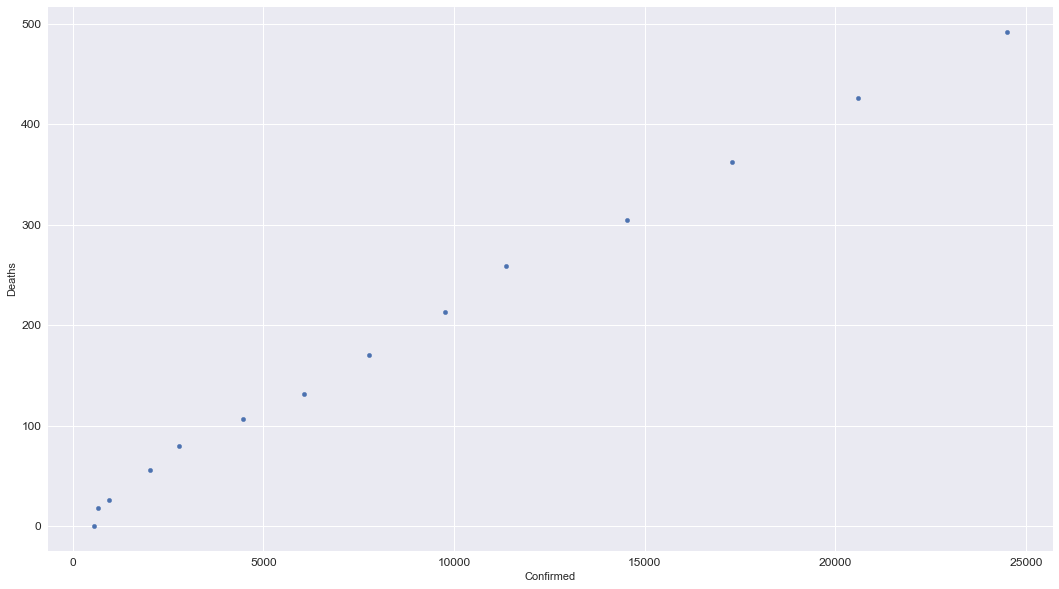

In [133]:
spread_global.plot(kind='scatter', x='Confirmed', y='Deaths', figsize=(18,10), fontsize=12)


## 7. Show dependence between confirmed cases and recovered case

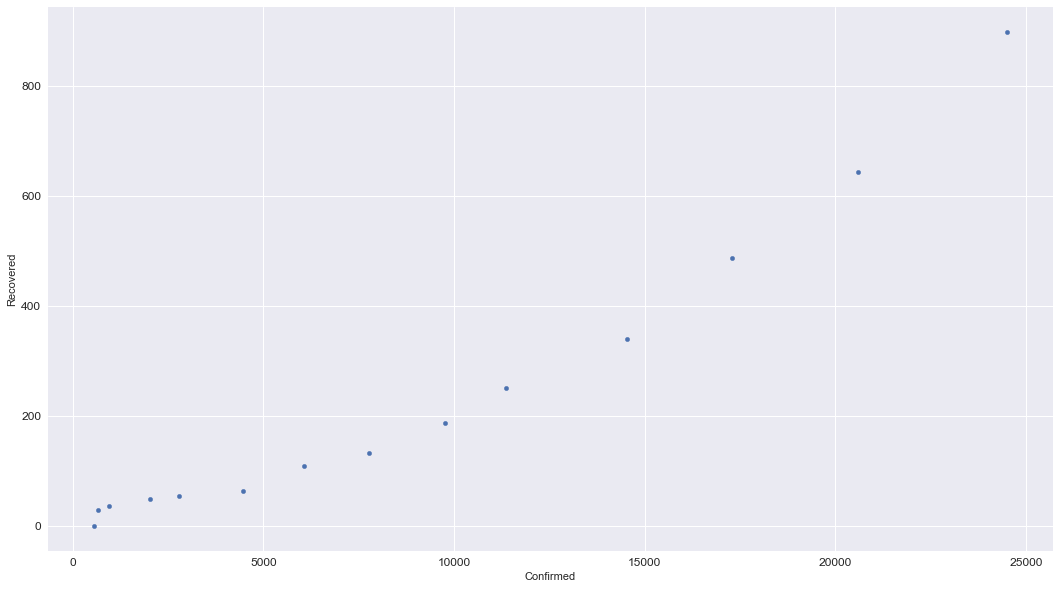

In [134]:
spread_global.plot(kind='scatter', x='Confirmed', y='Recovered', figsize=(18,10), fontsize=12)